In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [2]:
train = pd.read_csv('./_data/train.csv', index_col=0)#id를 인덱스로
test = pd.read_csv('./_data/test.csv', index_col=0)

## train.csv : 학습 데이터
* id: 데이터 고유 id
* age: 나이
* sex: 성별 (여자 = 0, 남자 = 1)
* cp: 가슴 통증(chest pain) 종류 
    * 0 : asymptomatic 무증상
    * 1 : atypical angina 일반적이지 않은 협심증
    * 2 : non-anginal pain 협심증이 아닌 통증
    * 3 : typical angina 일반적인 협심증
* trestbps: (resting blood pressure) 휴식 중 혈압(mmHg)
* chol: (serum cholestoral) 혈중 콜레스테롤 (mg/dl)
* fbs: (fasting blood sugar) 공복 중 혈당 (120 mg/dl 이하일 시 = 0, 초과일 시 = 1)
* restecg: (resting electrocardiographic) 휴식 중 심전도 결과 
    * 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
    * 1: 정상
    * 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: (maximum heart rate achieved) 최대 심박수
* exang: (exercise induced angina) 활동으로 인한  협심증 여부 (없음 = 0, 있음 = 1)
* oldpeak: (ST depression induced by exercise relative to rest) 휴식 대비 운동으로 인한 ST 하강
* slope: (the slope of the peak exercise ST segment) 활동 ST 분절 피크의 기울기
    * 0: downsloping 하강
    * 1: flat 평탄
    * 2: upsloping 상승
* ca: number of major vessels colored by flouroscopy 형광 투시로 확인된 주요 혈관 수 (0~3 개) 
* Null 값은 숫자 4로 인코딩됨 
* thal: thalassemia 지중해빈혈 여부
    * 0 = Null 
    * 1 = normal 정상
    * 2 = fixed defect 고정 결함
    * 3 = reversable defect 가역 결함
* target: 심장 질환 진단 여부
    * 0: < 50% diameter narrowing
    * 1: > 50% diameter narrowing

In [3]:
train.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,54.496689,0.682119,1.066225,132.033113,244.529801,0.158940,0.509934,150.629139,0.324503,0.976821,1.377483,0.602649,2.317881,0.549669
std,8.904586,0.467202,1.056213,17.909929,56.332206,0.366837,0.514685,23.466463,0.469747,1.085998,0.640226,0.917093,0.604107,0.499183
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.000000,0.000000,120.000000,208.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,270.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,1.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       151 non-null    int64  
 1   sex       151 non-null    int64  
 2   cp        151 non-null    int64  
 3   trestbps  151 non-null    int64  
 4   chol      151 non-null    int64  
 5   fbs       151 non-null    int64  
 6   restecg   151 non-null    int64  
 7   thalach   151 non-null    int64  
 8   exang     151 non-null    int64  
 9   oldpeak   151 non-null    float64
 10  slope     151 non-null    int64  
 11  ca        151 non-null    int64  
 12  thal      151 non-null    int64  
 13  target    151 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 17.7 KB


In [3]:
target = train.loc[train['target']==1]
nontarget = train.loc[train['target']==0]

In [4]:
target.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.0
mean,52.506024,0.578313,1.481928,130.048193,246.409639,0.180723,0.518072,158.361446,0.156627,0.563855,1.554217,0.216867,2.084337,1.0
std,9.012692,0.496831,0.941735,16.345286,62.035009,0.387128,0.502711,19.949680,0.365658,0.735275,0.629615,0.605829,0.498897,0.0
min,34.000000,0.000000,0.000000,94.000000,141.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,45.000000,0.000000,1.000000,120.000000,210.000000,0.000000,0.000000,149.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,53.000000,1.000000,2.000000,130.000000,236.000000,0.000000,1.000000,162.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,58.500000,1.000000,2.000000,139.000000,270.000000,0.000000,1.000000,173.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,71.000000,1.000000,3.000000,180.000000,564.000000,1.000000,1.000000,194.000000,1.000000,3.500000,2.000000,3.000000,3.000000,1.0


In [5]:
nontarget.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.0
mean,56.926471,0.808824,0.558824,134.455882,242.235294,0.132353,0.500000,141.191176,0.529412,1.480882,1.161765,1.073529,2.602941,0.0
std,8.197772,0.396151,0.967877,19.501576,48.834511,0.341394,0.532524,24.109983,0.502845,1.228670,0.588707,1.012108,0.601979,0.0
min,35.000000,0.000000,0.000000,108.000000,131.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,206.000000,0.000000,0.000000,126.000000,0.000000,0.575000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,242.500000,0.000000,0.000000,142.500000,1.000000,1.200000,1.000000,1.000000,3.000000,0.0
75%,62.250000,1.000000,1.000000,144.250000,270.250000,0.000000,1.000000,161.000000,1.000000,2.450000,2.000000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,192.000000,407.000000,1.000000,2.000000,195.000000,1.000000,5.600000,2.000000,3.000000,3.000000,0.0


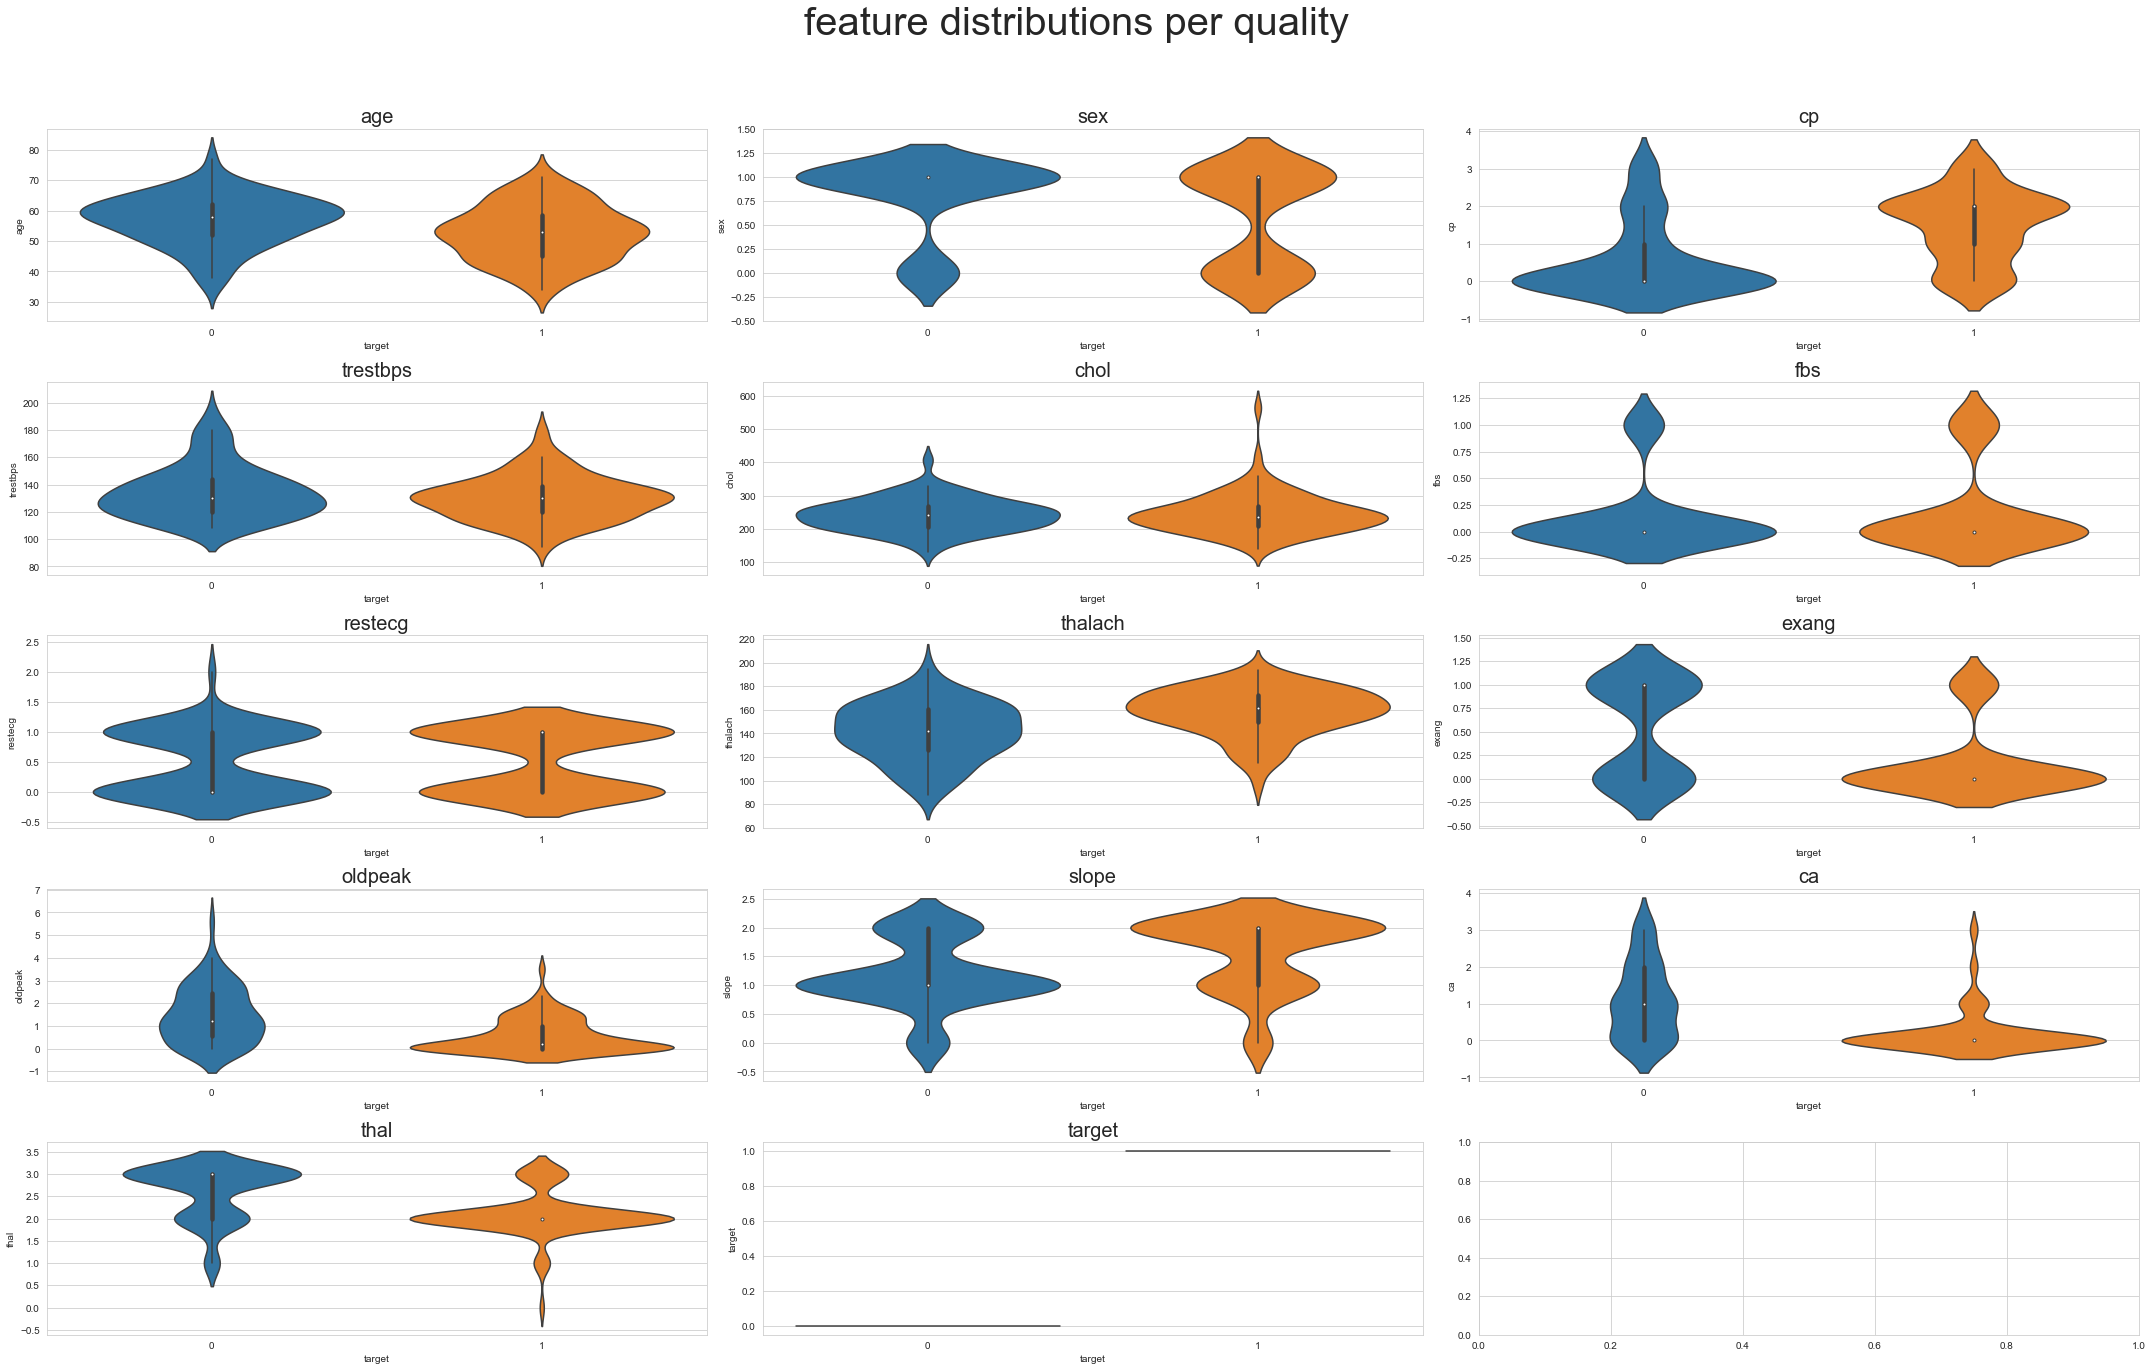

In [7]:
sns.set_style('whitegrid')   
fig, axes = plt.subplots(5, 3, figsize=(30, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, train.columns):
    sns.violinplot(x= 'target', y= col, ax=ax, data=train)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

* age:
* sex: 여성이 남성보다 심장질환에 취약
* cp ==2 심장질환일 확률 높음, cp==0 아닐 확률 높음
* trestbps, fbs: ..
* chol: 콜레스테롤이 높으면 심장질환 가능성 높음
* restecg ==2 심장질환 아닐 가능성 높음
* thalach : 심박수가 160 일때 심장질환일 가능성..?
* exang == 0 심장질환 다수
* oldpeak ==0 
* slope==2
* ca == 0 
* thal == 2



In [26]:
y_train = train.pop('target')
y_train = y_train.to_numpy()


In [ ]:
x_train = train.drop(columns=['trestbps','fbs','thalach']).to_numpy()

* 'trestbps','fbs' feature 제거

In [27]:
x_test = test.drop(columns=['trestbps','fbs','thalach']).to_numpy()

In [29]:
import tensorflow as tf
import autokeras as ak
ak_model = ak.StructuredDataClassifier(
    overwrite=True, max_trials=3, loss='binary_crossentropy'
)
ak_model.fit(x_train, y_train, epochs=100, validation_split=0.3)

Trial 3 Complete [00h 00m 08s]
val_accuracy: 0.9130434989929199

Best val_accuracy So Far: 0.9130434989929199
Total elapsed time: 00h 00m 16s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
5/5 [==============================] - 1s 2ms/step - loss: 0.7338 - accuracy: 0.5563
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7437 - accuracy: 0.5033
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7061 - accuracy: 0.5364
Epoch 4/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7017 - accuracy: 0.5695
Epoch 5/100
5/5 [==============================] - 0s 1ms/step - loss: 0.7094 - accuracy: 0.5166
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6373 - accuracy: 0.6490
Epoch 7/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6476 - accuracy: 0.6424
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6556
Epoch 9/100
5/5 [===========================

5/5 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8675
Epoch 83/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4708 - accuracy: 0.7881
Epoch 84/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4048 - accuracy: 0.8543
Epoch 85/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8212
Epoch 86/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8013
Epoch 87/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3775 - accuracy: 0.8146
Epoch 88/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8079
Epoch 89/100
5/5 [==============================] - 0s 1ms/step - loss: 0.3852 - accuracy: 0.8212
Epoch 90/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3838 - accuracy: 0.8477
Epoch 91/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8146
Epoch 92/100
5/5 [===============

In [30]:
predict_y = ak_model.predict(x_test)

5/5 [==============================] - 0s 1ms/step


In [31]:
predict_y

array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [32]:
submission = pd.read_csv('./_data/sample_submission.csv')

In [33]:
submission['target']=predict_y

In [34]:
submission.to_csv('./submission6.csv', index=False)

# score 0.90909

# 해볼것 
* EDA 추가
* 다른 모델로 해보기
* 0.02 만 올리면 순위권인데 ㅜ0ㅜ